# Generate results

This script is used to generate plots/final results from raw results coming from simulations.

In [56]:
import os, sys
parent_dir = os.path.abspath('..')

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from math import ceil, floor
from numpy.random import default_rng
rng = default_rng()

import utils as src

In [58]:
print(list(np.round(np.logspace(-1, 0, 31), decimals=3))[::-1])

[1.0, 0.926, 0.858, 0.794, 0.736, 0.681, 0.631, 0.584, 0.541, 0.501, 0.464, 0.43, 0.398, 0.369, 0.341, 0.316, 0.293, 0.271, 0.251, 0.233, 0.215, 0.2, 0.185, 0.171, 0.158, 0.147, 0.136, 0.126, 0.117, 0.108, 0.1]


In [59]:
# Specify the methods to compare
# method_keys = ['true', 
#                'cospar-st', 
#                'cospar-mt', 
#                'lineageot-st', 'lineageot-mt']
method_keys = ['cospar-mt', 'cospar-mt-fitted']

In [60]:
RAW_RESULTS_DIR = "~/Documents/Research/simulation-study/merged-results-sim-4-effect"

In [61]:
plt.style.use('plot_style.txt')

## Load the raw results data

In [62]:
#Load the raw results files as dataframes
stats_df = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "statistics.csv"))
MT_census_df = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "MT_census.csv"))
transition_table_df = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "transition_tables.csv"))
fate_df = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "fate_probability_results.csv"))
ancestor_df = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "ancestor_distribution_results.csv"))
growth_df = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "growth_statistics.csv"))
marg_diff_df = pd.read_csv(os.path.join(RAW_RESULTS_DIR, "marginal_differences.csv"))

In [63]:
# Get the simulation, sampling rate and method info
simulation_keys = list(stats_df['Simulation'].unique())
simulation_keys.sort()
n_simulations = len(simulation_keys)

sampling_rates = list(stats_df['Sample rate'].unique())
sampling_rates.sort(reverse=True)
sample_keys = [str(r) for r in sampling_rates]

print(simulation_keys)
print(sample_keys)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['1.0', '0.501', '0.398', '0.369', '0.341', '0.316', '0.293', '0.271', '0.251', '0.233', '0.215', '0.2', '0.185', '0.171', '0.158', '0.147', '0.136', '0.126', '0.117', '0.108', '0.1']


In [64]:
# Extract the time info
timepoints = list(stats_df['Order'].unique())
timepoints.sort()

assert len(timepoints) == 2
t1 = float(timepoints[0])
t2 = float(timepoints[1])

print(timepoints)

[1.0, 2.0]


In [65]:
# Get cell type information
cell_types_at_t1 = list(transition_table_df['Cell type t1'].unique())
cell_types_at_t2 = list(transition_table_df['Cell type t2'].unique())
cell_types = {str(t1): cell_types_at_t1, str(t2): cell_types_at_t2}

cell_types


{'1.0': ['progenitor', 'type A'], '2.0': ['type A', 'type B']}

In [66]:
# Specify the barcoding rate used (should change to save and extract from raw results)
barcode_rate=0.8

In [67]:
# Assign colors by cell type for plotting
celltype_color = {'progenitor': 'tab:green',
                  'type A': 'tab:red',
                  'type B': 'tab:blue'}

In [68]:
MT_census_df

,progenitor,type A,type B,Order,Sample rate,Simulation,progenitor predicted,type A predicted
0,0.567261,0.432739,0.000000,1.0,1.000,0.0,0.604829,0.395171
1,0.000000,0.584516,0.415484,2.0,1.000,0.0,NaN,NaN
2,0.675355,0.324645,0.000000,1.0,0.501,0.0,0.674554,0.325446
3,0.000000,0.566802,0.433198,2.0,0.501,0.0,NaN,NaN
4,0.647590,0.352410,0.000000,1.0,0.398,0.0,0.669571,0.330429
...,...,...,...,...,...,...,...,...
415,0.000000,0.605442,0.394558,2.0,0.117,9.0,NaN,NaN
416,0.703704,0.296296,0.000000,1.0,0.108,9.0,0.700052,0.299948
417,0.000000,0.575342,0.424658,2.0,0.108,9.0,NaN,NaN
418,0.706422,0.293578,0.000000,1.0,0.100,9.0,0.710632,0.289368


In [69]:
print(marg_diff_df.mean())
print(marg_diff_df.max())

Max Marg Diff t1    1.095626e-06
Max Marg Diff t2    5.656676e-09
dtype: float64
Max Marg Diff t1    3.993511e-06
Max Marg Diff t2    5.960465e-08
dtype: float64


## Summarise that statistics of the simulated datasets

In [70]:
stats_df

,Simulation,Sample rate,Order,N cells,N progenitor
0,0,1.000,1.0,1000,488
1,0,1.000,2.0,5420,0
2,0,0.501,1.0,2000,1034
3,0,0.501,2.0,11362,0
4,0,0.398,1.0,2516,1264
...,...,...,...,...,...
415,9,0.117,2.0,47396,0
416,9,0.108,1.0,9260,4576
417,9,0.108,2.0,51364,0
418,9,0.100,1.0,10000,5104


In [71]:
# Print the mean t2 sampling rates
values = []
for r in sampling_rates:
    values.append(1000/stats_df[(stats_df['Sample rate'] == r) & (stats_df['Order'] == 2)]['N cells'].mean())
    
print("Mean t2 sampling rates: ", np.round(values, decimals=5))
t2_sample_keys = [str(r) for r in np.round(values, decimals=4)]

Mean t2 sampling rates:  [0.1845  0.08801 0.0706  0.06651 0.06039 0.05612 0.05268 0.04926 0.04415
 0.041   0.03824 0.03525 0.0332  0.03033 0.02843 0.02621 0.02406 0.0225
 0.0211  0.01947 0.01767]


In [72]:
growth_df

,Simulation,Sample rate,Order,Cell type,Growth mean,Growth std
0,0,1.000,1.0,progenitor,8.000000,0.000000
1,0,1.000,1.0,type A,2.960938,2.202658
2,0,0.501,1.0,progenitor,8.000000,0.000000
3,0,0.501,1.0,type A,3.198758,2.400311
4,0,0.398,1.0,progenitor,8.000000,0.000000
...,...,...,...,...,...,...
415,9,0.117,1.0,type A,3.199451,2.399863
416,9,0.108,1.0,progenitor,8.000000,0.000000
417,9,0.108,1.0,type A,3.150299,2.362159
418,9,0.100,1.0,progenitor,8.000000,0.000000


Mean for progenitor = 8.0
Standard deviation for progenitor = 0.0
Mean for type A = 3.2011456136831256
Standard deviation for type A = 2.400066998388239


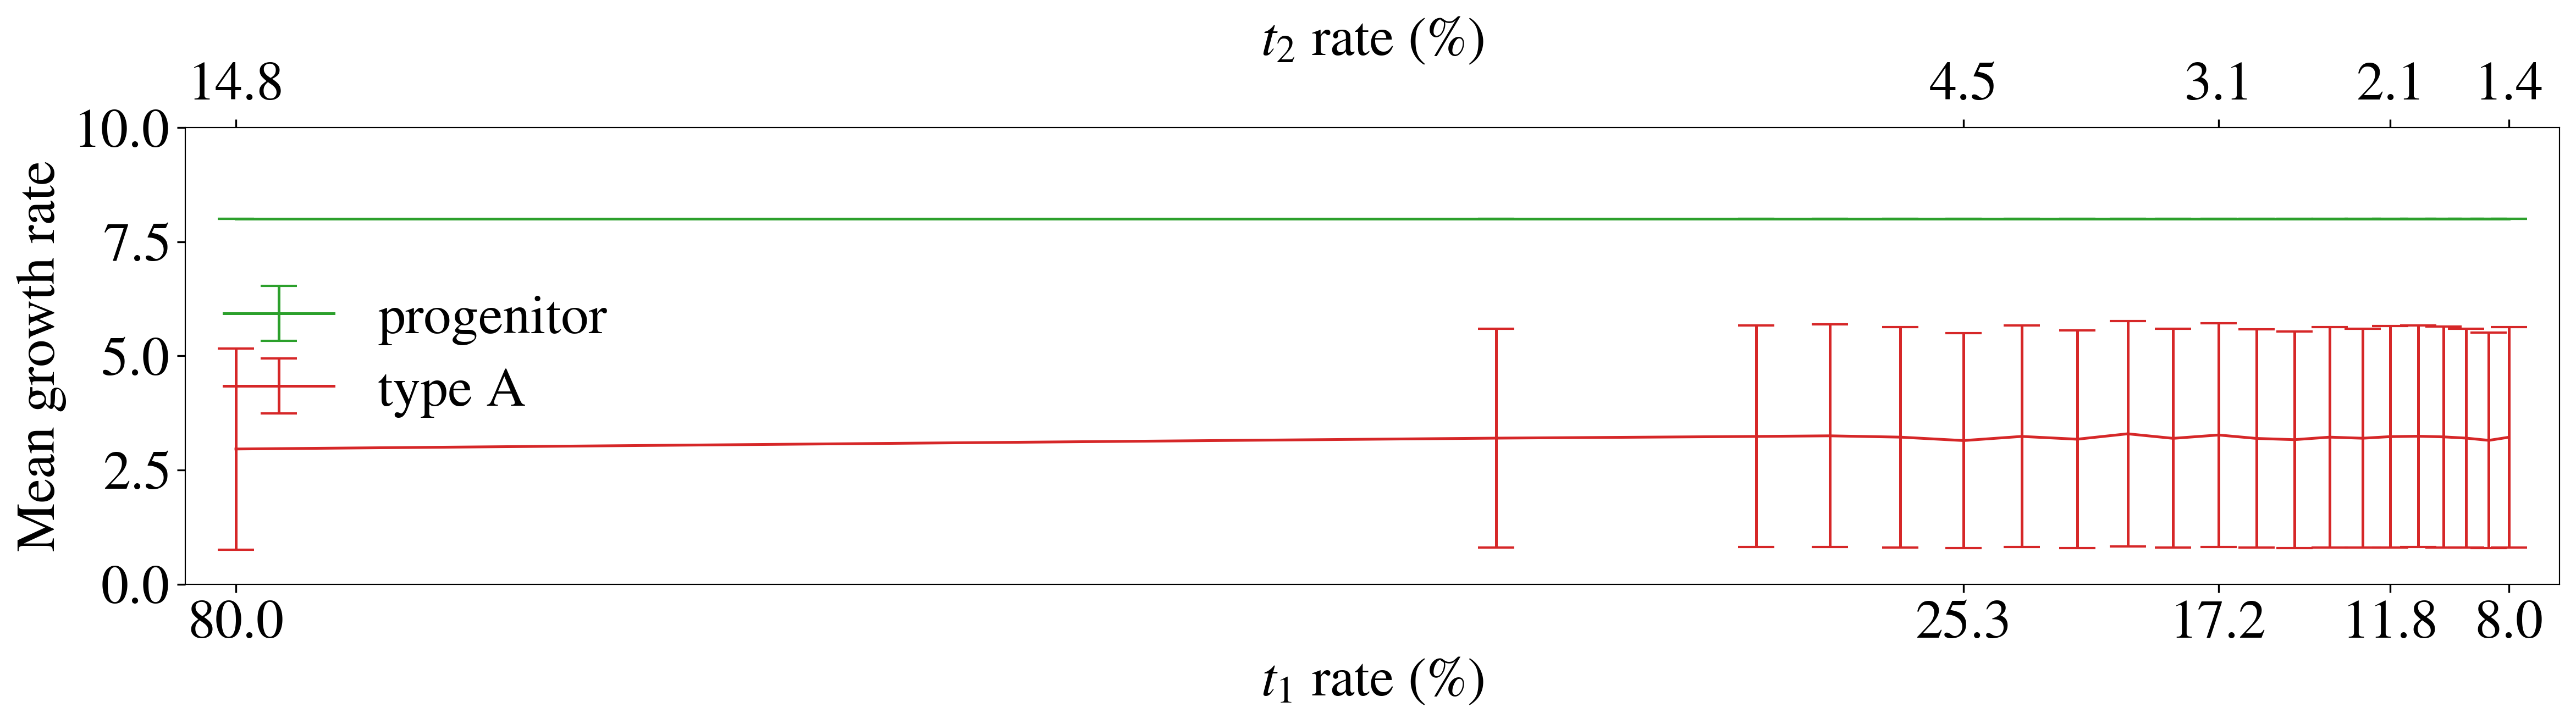

In [73]:
# Plot the mean growth rates over sampling rates
fig, ax = plt.subplots(figsize=(16,4))
fig.tight_layout()
# plt.title('Mean growth rate (over cells, over simulations)', fontweight="bold")
x_label_t1 = "$t_1$ rate (%)"
plt.xlabel(x_label_t1)

x_label_t2 = "$t_2$ rate (%)"

plt.ylabel("Mean growth rate")
# plt.ylim(0, 20)

step = 5

sample_labels = 100*np.array(sampling_rates)*barcode_rate
sample_labels = [str(s) for s in np.round(sample_labels[::step], decimals=1)]
ax.set_xticks(sampling_rates[::step], 
           sample_labels )  # Set text labels
ax.invert_xaxis()
ax.set_xlim(1.02, 0.08)

# Plot t2 sampling rate as a second axis
ax2 = ax.twiny()
t2_sample_labels = 100*np.array(values)*barcode_rate
t2_sample_labels = [str(s) for s in np.round(t2_sample_labels[::step], decimals=1)]

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(sampling_rates[::step], t2_sample_labels)  # Set text labels
ax2.set_xlabel(x_label_t2)
# ax2.invert_xaxis()

# Compute and plot the statistics
for i in range(len(cell_types_at_t1)):
    c = cell_types_at_t1[i]
    
    growth_mean = np.zeros(len(sampling_rates))
    growth_std = np.zeros(len(sampling_rates))

    c_mask = growth_df['Cell type'] == c
    
    for j in range(len(sampling_rates)):
        r = sampling_rates[j]
        mask = (growth_df['Sample rate'] == r) &\
               (growth_df['Order'] == t1) & c_mask
        
        growth_mean[j] = growth_df[mask]['Growth mean'].mean()
        growth_std[j] = growth_df[mask]['Growth std'].mean()
        
    # Plot with errorbars      
    ax.errorbar(sampling_rates, growth_mean, yerr=growth_std, 
                capsize=8, color=celltype_color[c], label=c)
    
    print("Mean for {} = {}".format(c, np.mean(growth_mean)))
    print("Standard deviation for {} = {}".format(c, np.mean(growth_std)))

ax.legend(framealpha=0.5)
plt.show()
    


## Plot the predicted MT-census proportions at $t_1$

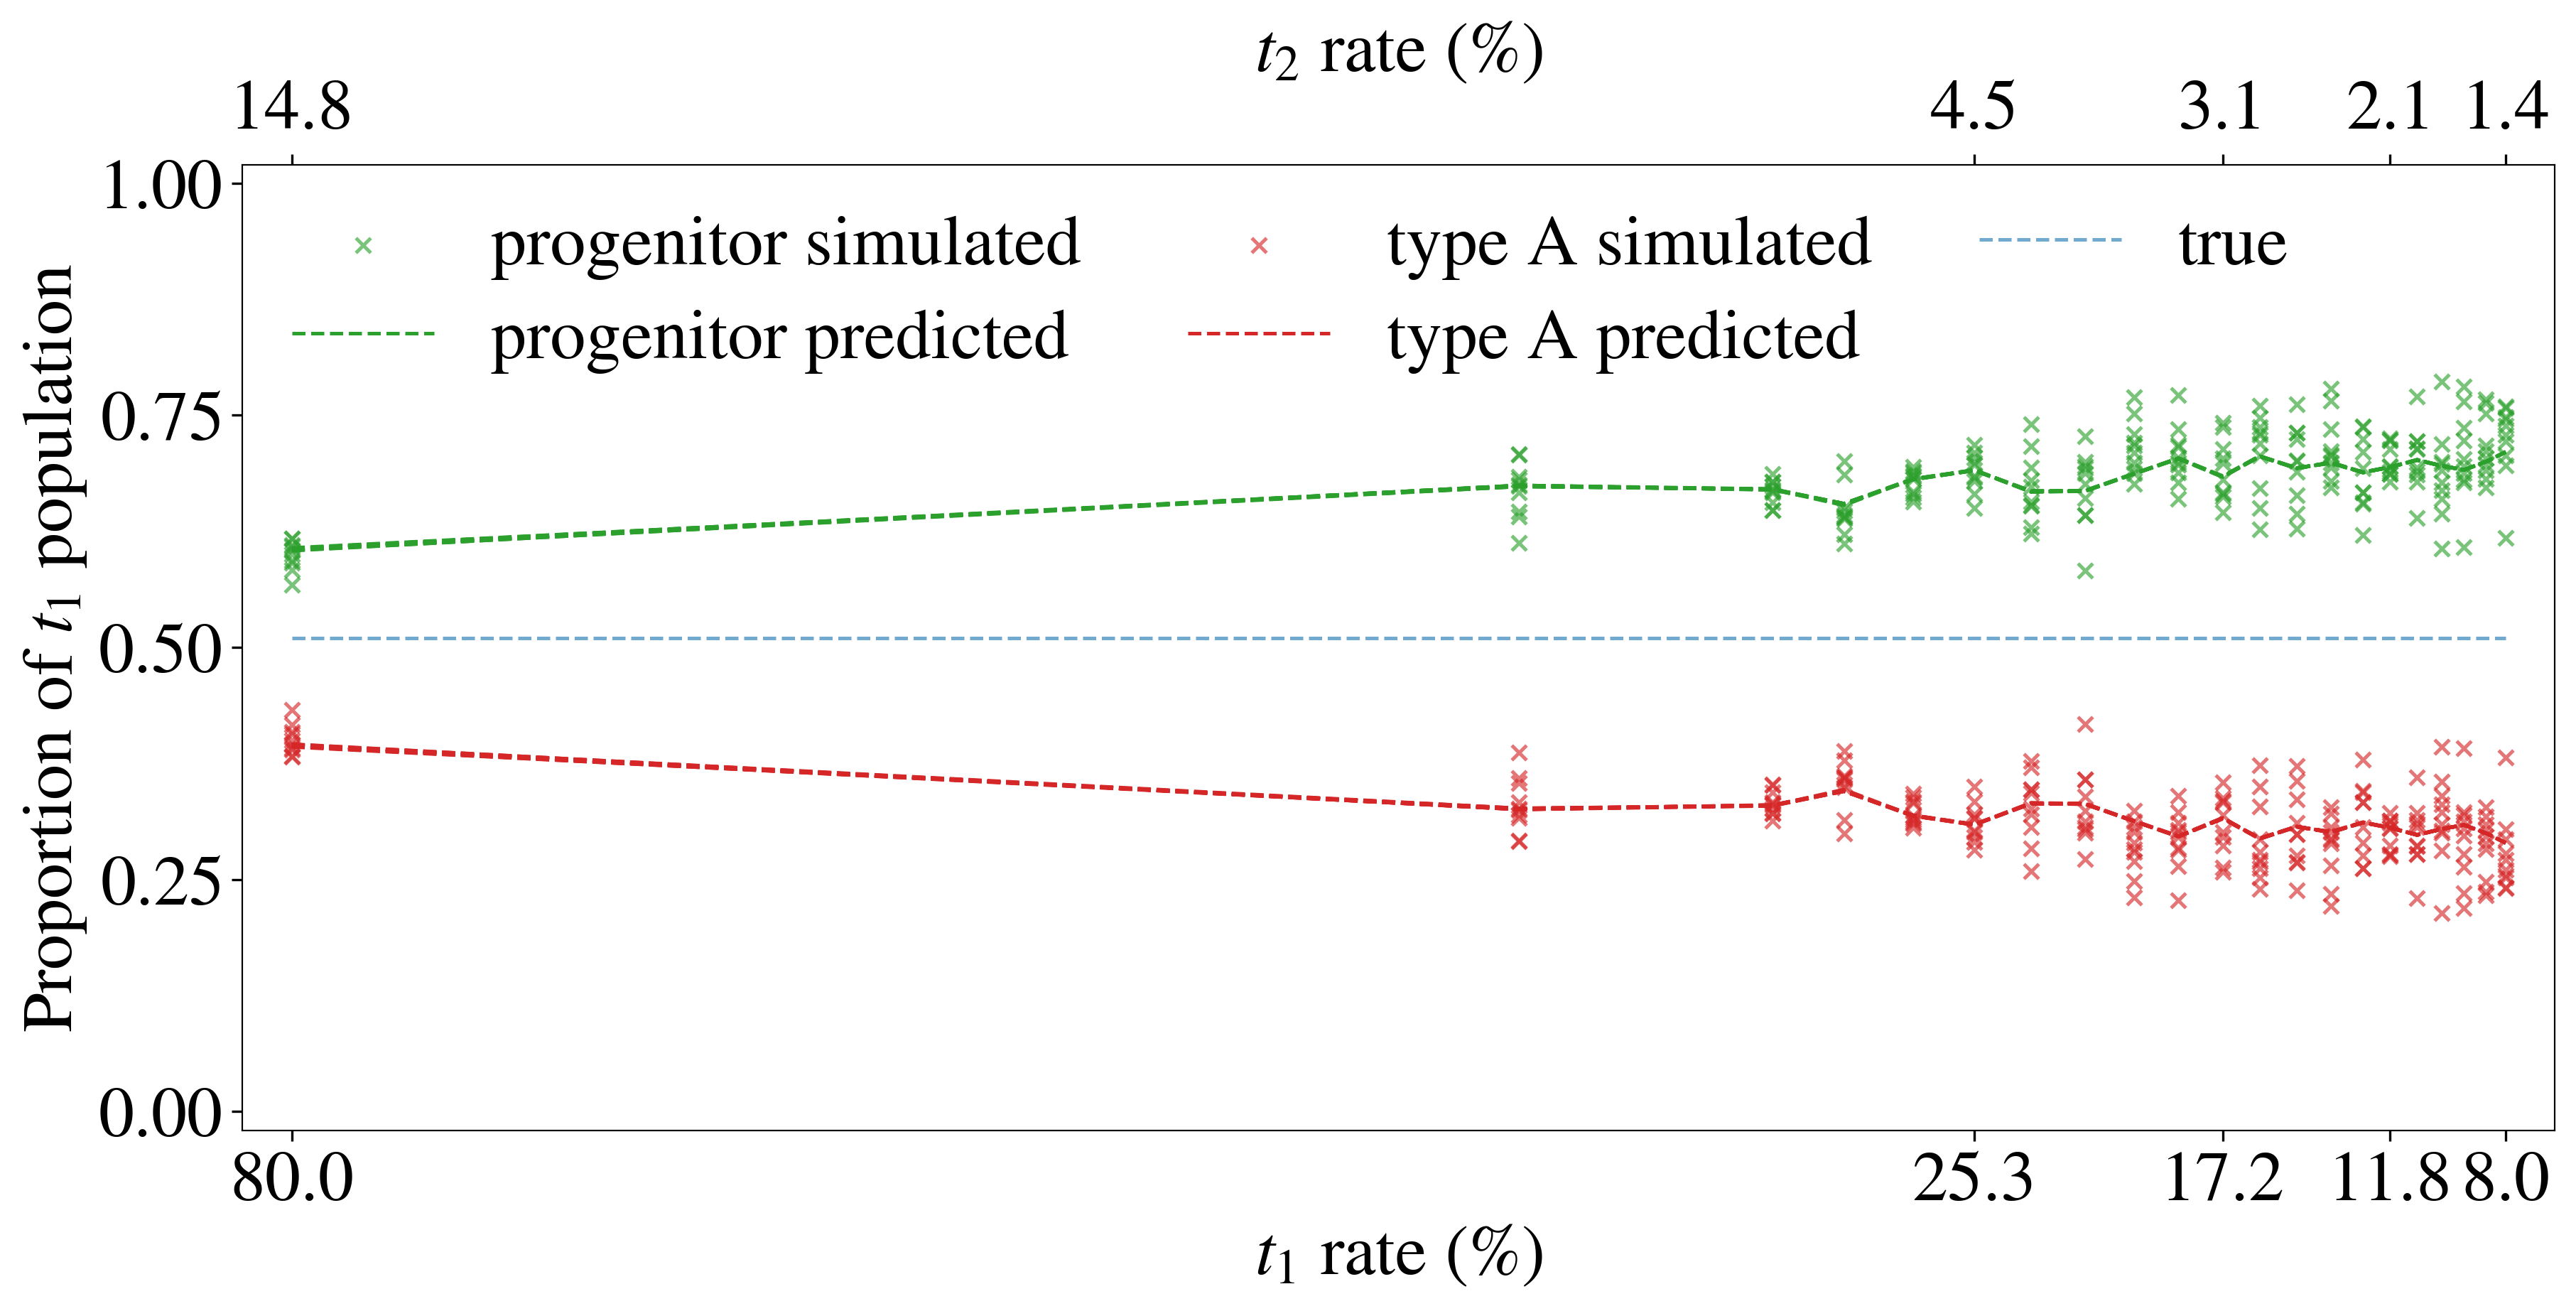

In [74]:
# Plot the cell census at different sampling rates against the predicted proportions
alpha = 0.2*((100/n_simulations)**(1/2))
# alpha=1.0

fig, ax = plt.subplots(figsize=(14, 6))
# plt.title("Cell type proportions in MT at t1, b = {}".format(barcode_rate), fontweight="bold")
plt.ylabel("Proportion of $t_1$ population")
plt.xlabel(x_label_t1)

for x in range(n_simulations):
    sim_key = x
    z_t1 = np.zeros((len(cell_types[str(t1)]), len(sampling_rates)))
    p_type_given_MT = np.zeros((len(cell_types[str(t1)]), len(sampling_rates)))

    for i in range(len(sampling_rates)):
        r = sampling_rates[i]
        rate_key = sample_keys[i]

        for j in range(len(cell_types[str(t1)])):
            c = cell_types[str(t1)][j]
            mask = (MT_census_df['Simulation'] == sim_key) &\
                   (MT_census_df['Sample rate'] == r) &\
                   (MT_census_df['Order'] == t1)
            z_t1[j, i] = MT_census_df[mask][c].iloc[0]
            p_type_given_MT[j, i] = MT_census_df[mask][c + ' predicted'].iloc[0]

    if x == n_simulations-1:
#         locs, labels = plt.xticks()  # Get the current locations and labels.
#         labels = sample_keys[::2]
#         plt.xticks(np.arange(len(sample_keys), step=2), labels)  # Set text labels
        
#         # Plot t2 sampling rate as a second axis
#         labels_2 = t2_sample_keys[::2]
#         ax2 = ax.twiny()
#         plt.xticks(np.arange(len(sample_keys), step=2), labels_2)  # Set text labels
#         ax2.set_xlabel('mean t2 sampling rate')

        for i in range(len(cell_types[str(t1)])):
            c = cell_types[str(t1)][i]
            plt.scatter(sampling_rates, z_t1[i], label=cell_types[str(t1)][i] + ' simulated', 
                        color=celltype_color[c], alpha=alpha, marker='x')
            plt.plot(sampling_rates, p_type_given_MT[i], label=c + ' predicted', color=celltype_color[c], 
                     ls="--")

        # Fill array with true proportions for the simulation from that sampling rate
        true_proportion = np.zeros(len(sampling_rates))
        for i in range(len(sampling_rates)):
            mask = (stats_df['Simulation'] == sim_key) &\
                   (stats_df['Sample rate'] == r) &\
                   (stats_df['Order'] == t1)
            true_proportion[i] = stats_df[mask]['N progenitor'].iloc[0]/stats_df[mask]['N cells'].iloc[0]   # assumes just two types at t1

        plt.plot(sampling_rates, true_proportion, alpha=alpha, ls="--", label='true')

    else:
        for i in range(len(cell_types[str(t1)])):
            c = cell_types[str(t1)][i]
            plt.scatter(sampling_rates, z_t1[i], color=celltype_color[c], alpha=alpha, marker='x')
            plt.plot(sampling_rates, p_type_given_MT[i], color=celltype_color[c], ls="--")

# Set the x-tick labels
ax.set_xticks(sampling_rates[::step], 
           sample_labels )  # Set text labels
ax.invert_xaxis()
ax.set_xlim(1.02, 0.08)
ax.set_ylim(-0.02, 1.02)

# Plot t2 sampling rate as a second axis
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(sampling_rates[::step], t2_sample_labels)  # Set text labels
ax2.set_xlabel(x_label_t2)

            
ax.legend(framealpha=0.2, ncol=3, loc="upper left")
plt.show()

In [75]:
true_proportion

array([0.5104, 0.5104, 0.5104, 0.5104, 0.5104, 0.5104, 0.5104, 0.5104,
       0.5104, 0.5104, 0.5104, 0.5104, 0.5104, 0.5104, 0.5104, 0.5104,
       0.5104, 0.5104, 0.5104, 0.5104, 0.5104])

In [76]:
MT_census_df[MT_census_df['Order'] == t1].min(0)

progenitor              0.567261
type A                  0.213740
type B                  0.000000
Order                   1.000000
Sample rate             0.100000
Simulation              0.000000
progenitor predicted    0.604130
type A predicted        0.289286
dtype: float64

In [77]:
MT_census_df[MT_census_df['Order'] == t1].max(0)

progenitor              0.786260
type A                  0.432739
type B                  0.000000
Order                   1.000000
Sample rate             1.000000
Simulation              9.000000
progenitor predicted    0.710714
type A predicted        0.395870
dtype: float64

## Plot the entries of the mean transition tables over the sampling rate

In [78]:
# Plot each entry of the mean transition tables over the sampling rate
# Use a dropdown to select which entry
ancestor_dropdown = widgets.Dropdown(
    options=cell_types_at_t1,
    description='State at t1:',
    value='type A'
)

fate_dropdown = widgets.Dropdown(
    options=cell_types_at_t2,
    description='State at t2:',
    value='type A'
)

def update_transition_mass_vs_sampling_rate(state_t1, state_t2):
    df = transition_table_df
    value_key = 'Transition mass'
    
    fig, ax = plt.subplots(figsize=(16,8))
    fig.tight_layout()
    
    # Set the x-tick labels
    ax.set_xticks(sampling_rates[::step], 
               sample_labels )  # Set text labels
    ax.invert_xaxis()
    ax.set_xlim(1.02, 0.08)
    ax.set_ylim(-0.02, 0.7)
    ax.set_xlabel(x_label_t1)
    ax.set_ylabel("Mass transported")

    # Plot t2 sampling rate as a second axis
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(sampling_rates[::step], t2_sample_labels)  # Set text labels
    ax2.set_xlabel(x_label_t2)

    y_mean = {}
    y_std = {}

    for method in method_keys:
        y_mean[method] = []
        y_std[method] = []
        
        for r in sampling_rates:
            mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                               (df['Cell type t1'] == state_t1) & (df['Cell type t2'] == state_t2)
            values = df[mask][value_key]
            y_mean[method].append(values.mean())
            y_std[method].append(values.std())
            
        line = None
        marker = 'x'
        capsize=8
        label=None
        if method == 'cospar-st': 
            label = 'CoSpar-ST'
        elif method == 'cospar-mt-fitted':
                    label = 'CoSpar-MT-IPF'
        elif method == 'cospar-mt': 
            label = 'CoSpar-MT'
        elif method == 'lineageot-st':
            label = 'LineageOT'
        elif method == 'lineageot-mt':
            label = 'LineageOT-MT'
                
        ax.errorbar(sampling_rates, y_mean[method], yerr=y_std[method], 
                     label=label, linestyle=line, marker=marker, capsize=capsize)
        
    ax.legend(framealpha=0.5)
    
widgets.interact(update_transition_mass_vs_sampling_rate, state_t1=ancestor_dropdown, state_t2=fate_dropdown)

interactive(children=(Dropdown(description='State at t1:', index=1, options=('progenitor', 'type A'), value='t…

<function __main__.update_transition_mass_vs_sampling_rate(state_t1, state_t2)>

## Plot the correlation and Wasserstein distance between the true and estimated fate probabilites over sampling rate

In [79]:
# Plot correlation between true and estimated fate probabilities over sampling rate
def update_fate_corr_plot(l):
    df = fate_df
    value_key = 'Fate probability correlation'
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.tight_layout()
#     plt.title("Correlation with true fate probability (mean over 10 simulations)", fontweight="bold")
    
    # Set the x-tick labels
    ax.set_xticks(sampling_rates[::step], 
               sample_labels )  # Set text labels
    ax.invert_xaxis()
    ax.set_xlim(1.02, 0.08)
    ax.set_ylim(0.18, 1.02)
    ax.set_xlabel(x_label_t1)
    ax.set_ylabel("Correlation")

#     # Plot t2 sampling rate as a second axis
#     ax2 = ax.twiny()
#     ax2.set_xlim(ax.get_xlim())
#     ax2.set_xticks(sampling_rates[::step], t2_sample_labels)  # Set text labels
#     ax2.set_xlabel(x_label_t2)

    y_mean = {}
    y_std = {}

    for method in method_keys:
        y_mean[method] = []
        y_std[method] = []
        
        if method == 'true':
            line=''
            marker=None
            capsize=0
            label=None
            y_mean[method] = np.ones_like(sampling_rates)*1.0
            y_std[method] = np.zeros_like(sampling_rates)
            
#         elif method == 'cospar-st' or method == 'cospar-mt':
#             line=''
#             marker=None
#             capsize=0
#             label=None
#             y_mean[method] = np.ones_like(sampling_rates)*1.0
#             y_std[method] = np.zeros_like(sampling_rates)

        else:
            for r in sampling_rates:
                mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                    (df['Cell type t2'] == l)
                values = df[mask][value_key]
                y_mean[method].append(values.mean())
                y_std[method].append(values.std())

                line = None
                marker = 'x'
                capsize=8
                if method == 'cospar-st': 
                    label = 'CoSpar-ST'
                elif method == 'cospar-mt-fitted':
                    label = 'CoSpar-MT-IPF'
                elif method == 'cospar-mt': 
                    label = 'CoSpar-MT'
                elif method == 'lineageot-st':
                    label = 'LineageOT'
                elif method == 'lineageot-mt':
                    label = 'LineageOT-MT'
                
        ax.errorbar(sampling_rates, y_mean[method], yerr=y_std[method], 
                     label=label, linestyle=line, marker=marker, capsize=capsize)
        
    ax.legend(framealpha=0.5, loc='upper right')
    
        
widgets.interact(update_fate_corr_plot, l=fate_dropdown)

interactive(children=(Dropdown(description='State at t2:', options=('type A', 'type B'), value='type A'), Outp…

<function __main__.update_fate_corr_plot(l)>

In [80]:
# Plot Wasserstein distance between the true and estimated fate probabilities over sampling rate
def update_fate_corr_plot(l):
    df = fate_df
    value_key = 'Fate probability W-distance'
    
    fig, ax = plt.subplots(figsize=(16,8))
    fig.tight_layout()
#     plt.title("Wasserstein distance to the true fate probability (mean over 10 simulations)", fontweight="bold")
    
    # Set the x-tick labels
    ax.set_xticks(sampling_rates[::step], 
               sample_labels )  # Set text labels
    ax.invert_xaxis()
    ax.set_xlim(1.02, 0.08)
    ax.set_ylim(-0.02, 33)
    ax.set_xlabel(x_label_t1)

    # Plot t2 sampling rate as a second axis
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(sampling_rates[::step], t2_sample_labels)  # Set text labels
    ax2.set_xlabel(x_label_t2)

    y_mean = {}
    y_std = {}

    for method in method_keys:
        y_mean[method] = []
        y_std[method] = []

        if method == 'true':
            line='--'
            marker=None
            capsize=0
            label='true'
            y_mean[method] = np.zeros_like(sampling_rates)
            y_std[method] = np.zeros_like(sampling_rates)

        else:
            for r in sampling_rates:
                mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                    (df['Cell type t2'] == l)
                values = df[mask][value_key]
                y_mean[method].append(values.mean())
                y_std[method].append(values.std())

                line = None
                marker = 'x'
                capsize=8
                if method == 'cospar-st': 
                    label = 'CoSpar-ST'
                elif method == 'cospar-mt-fitted':
                    label = 'CoSpar-MT-IPF'
                elif method == 'cospar-mt': 
                    label = 'CoSpar-MT'
                elif method == 'lineageot-st':
                    label = 'LineageOT'
                elif method == 'lineageot-mt':
                    label = 'LineageOT-MT'
            
        ax.errorbar(sampling_rates, y_mean[method], yerr=y_std[method], 
                     label=label, linestyle=line, marker=marker, capsize=capsize)
        

    ax.set_ylabel("Wasserstein distance")
    ax.legend(framealpha=0.5)
    
        
widgets.interact(update_fate_corr_plot, l=fate_dropdown)

interactive(children=(Dropdown(description='State at t2:', options=('type A', 'type B'), value='type A'), Outp…

<function __main__.update_fate_corr_plot(l)>

## Plot the correlation and Wasserstein distance between the true and estimated ancestor distributions over sampling rate

In [83]:
# Plot correlation between true and estimated ancestor distributions over sampling rate
def update_ancestor_corr_plot(l):
    df = ancestor_df
    value_key = 'Ancestor distribution correlation'
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.tight_layout()
#     plt.title("Correlation with true ancestor distribution (mean over 10 simulations)", fontweight="bold")
    
    # Set the x-tick labels
    ax.set_xticks(sampling_rates[::step], 
               sample_labels )  # Set text labels
    ax.invert_xaxis()
    ax.set_xlim(1.02, 0.08)
    ax.set_ylim(0.38, 1.02)
    ax.set_xlabel(x_label_t1)

#     # Plot t2 sampling rate as a second axis
#     ax2 = ax.twiny()
#     ax2.set_xlim(ax.get_xlim())
#     ax2.set_xticks(sampling_rates[::step], t2_sample_labels)  # Set text labels
#     ax2.set_xlabel(x_label_t2)

    y_mean = {}
    y_std = {}

    for method in method_keys:
        y_mean[method] = []
        y_std[method] = []

        if method == 'true':
            line=''
            marker=None
            capsize=0
            label=None
            y_mean[method] = np.ones_like(sampling_rates)*1.0
            y_std[method] = np.zeros_like(sampling_rates)
            
#         elif method == 'cospar-st' or method == 'cospar-mt':
#             line=''
#             marker=None
#             capsize=0
#             label=None
#             y_mean[method] = np.ones_like(sampling_rates)*1.0
#             y_std[method] = np.zeros_like(sampling_rates)

        else:
            for r in sampling_rates:
                mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                    (df['Cell type t2'] == l)
                values = df[mask][value_key]
                y_mean[method].append(values.mean())
                y_std[method].append(values.std())

                line = None
                marker = 'x'
                capsize=8
                if method == 'cospar-st': 
                    label = 'CoSpar-ST'
                elif method == 'cospar-mt-fitted':
                    label = 'CoSpar-MT-IPF'
                elif method == 'cospar-mt': 
                    label = 'CoSpar-MT'
                elif method == 'lineageot-st':
                    label = 'LineageOT'
                elif method == 'lineageot-mt':
                    label = 'LineageOT-MT'
                

        ax.errorbar(sampling_rates, y_mean[method], yerr=y_std[method], 
                     label=label, linestyle=line, marker=marker, capsize=capsize)
        

    ax.set_ylabel("Correlation")
    ax.legend(framealpha=0.5, loc='lower left')
    
        
widgets.interact(update_ancestor_corr_plot, l=fate_dropdown)

interactive(children=(Dropdown(description='State at t2:', options=('type A', 'type B'), value='type A'), Outp…

<function __main__.update_ancestor_corr_plot(l)>

In [82]:
# Plot Wasserstein distance between the true and estimated ancestor distributions over sampling rate
def update_fate_corr_plot(l):
    df = ancestor_df
    value_key = 'Ancestor distribution W-distance'
    
    fig, ax = plt.subplots(figsize=(16,8))
    fig.tight_layout()
#     plt.title("Wasserstein distance to the true ancestor distribution (mean over 10 simulations)", fontweight="bold")
    
    # Set the x-tick labels
    ax.set_xticks(sampling_rates[::step], 
               sample_labels )  # Set text labels
    ax.invert_xaxis()
    ax.set_xlim(1.02, 0.08)
    ax.set_ylim(-0.02, 33)
    ax.set_xlabel(x_label_t1)

    # Plot t2 sampling rate as a second axis
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(sampling_rates[::step], t2_sample_labels)  # Set text labels
    ax2.set_xlabel(x_label_t2)

    y_mean = {}
    y_std = {}

    for method in method_keys:
        y_mean[method] = []
        y_std[method] = []

        if method == 'true':
            line='--'
            marker=None
            capsize=0
            label='true'
            y_mean[method] = np.zeros_like(sampling_rates)
            y_std[method] = np.zeros_like(sampling_rates)

        else:
            for r in sampling_rates:
                mask = (df['Method'] == method) & (df['Sample rate'] == r) &\
                    (df['Cell type t2'] == l)
                values = df[mask][value_key]
                y_mean[method].append(values.mean())
                y_std[method].append(values.std())
                
                line = None
                marker = 'x'
                capsize=8
                label = method
            
        ax.errorbar(sampling_rates, y_mean[method], yerr=y_std[method], 
                     label=label, linestyle=line, marker=marker, capsize=capsize)
        
    ax.set_ylabel("Wasserstein distance")
    ax.legend(framealpha=0.5)
    
        
widgets.interact(update_fate_corr_plot, l=fate_dropdown)

interactive(children=(Dropdown(description='State at t2:', options=('type A', 'type B'), value='type A'), Outp…

<function __main__.update_fate_corr_plot(l)>